# Quantum Random Walks With Cirq - Tutorial

<i>The first section of this tutorial was taken from this blog post (written by the same person who wrote this tutorial):</i> https://lucaman99.github.io/blog/2019/08/03/Quantum-Random-Walks.html

<i>For more information about quantum random walks, see: https://arxiv.org/abs/quant-ph/0303081</i> 

**Classical Random Walks**

A random walks is a random process, involving a "walker" that is placed in some $n$-dimensional medium (like a grid or a graph). We then repeatedly query some random variable, and based on the outcome of our measurement, the walker's position vector (position on the graph or grid) is updated. A very basic example of a random walk is the one-dimensional graphical case, where we consider a marker placed on the origin of a number line with markings at each of the integers. Let the initial position vector of our marker be $|0\rangle$. For $N$ steps of our random walk, so take a set of $N$ random variables, $\{X_1, \ ..., \ X_N\}$, which can take on either a value of $1$ or $-1$ with equal probability ($0.5$). To find the updated position vector of our walker, we simply compute the value:
<br><br>
<center>
$j \ = \ \displaystyle\sum_{k \ = \ 1}^{N} \ X_k$
</center>
<br><br>
Where we know:
<br><br>
<center>
$|\text{Final}\rangle \ = \ |\text{Initial} \ + \ j\rangle$
</center>
<br><br>
So for our case, the final position vector is simply $|j\rangle$. This model of a random walk can easily be generalized to $n$-dimensions. Another important fact to note is that for a discrete, 1-dimensional random walk on a number-line-like graph, the probability of the random walker being at a specific location follows a binomial distribution. Let us define an $N$-step random walk. Let us then assert that $N \ = \ L \ + \ R$, where $L$ is the number of steps to the left, and $R$ is the number of steps to the right. We can then reason that if there is some probability $p_{r}$ of the walker taking a rightward step at one time-step of the random walk, the probability of taking a leftward step is given by $1 \ - \ p_{r}$. It follows that the probability of taking $L \ = \ N \ - \ R$ leftward steps, and $R$ rightward steps  in a random walk of $N$ total steps is given by:
<br><br>
<center>
$P(N, \ R) \ = \ p_{r}^R (1 \ - \ p_{r})^{N \ - \ R}$
</center>
We then have to consider the probability that for an $N$ step random walk, our walker ends up at position $X \ = \ L \ - \ R$. Well, we know the probability of taking $L$ left steps and $R$ right steps, and we know that for a random walk of $N$ steps, the position of the walker is determined by the number of left steps, minus the number of right steps. Since it doesn't matter the order in which the sequence of $N$ steps occurs, to find the total probability of being at some location, $P(X)$, we have to multiply the probability $P(L, \ R)$ by the number of possible ways in which $L$ left steps and $R$ right steps can be arranged in a sequence. Well, since we have $N$ total steps, we can "choose" $R$ of those steps to be allocated to rightward steps, and automatically know that the remaining $N \ - \ R$ steps were left steps. We calculate $N$ "choose" $R$ steps by calculating the binomial coefficient, therefore getting:
<br><br>
<center>
$P_{N}(X) \ = \ \begin{pmatrix} N \\ R \end{pmatrix} \ p_{r}^R (1 \ - \ p_{r})^{N \ - \ R}$
$\Rightarrow \ X \ = \ L \ - \ R \ \Rightarrow \ P_{N}(X) \ = \ \begin{pmatrix} N \\ \frac{N \ - \ X}{2} \end{pmatrix} \ p_{r}^{\frac{N \ - \ X}{2}} (1 \ - \ p_{r})^{\frac{N \ + \ X}{2}}$
</center>
<br><br>
And so we have shown that the probability distribution for the position of the walker for an $N$ step random walk is given by a binomial distribution. This fact is important, as we will show that the probability distribution that is created when a quantum random walk is simulated is nowhere close to the binomial distribution that we expect to see for a classical 1-dimensional random walk.
<br><br>

**Quantum Random Walks**

<br>
The process of the quantum random walk isn't that much different from its classical counterpart, although the observed results of the two processes have many differences. First, let us motivate the creation of a QRW. The idea is that when one performs analysis on a classical random walk, you can find that $\sigma^2 \ \sim \ T$, where $\sigma$ is the standard deviation of the random walk's probability distribution, and $T$ is the number of time-steps of the random walk. For the quantum random walk, we can see that $\sigma^2 \ \sim \ T^2$. In other words, the standard deviation grows at a quadratically faster rate. At a high level, this signifies that the quantum walker "spreads out" quadratically faster than the classical one, showing that the process of a QRW is quadratically faster than its classical counterpart.

<br>

In order to create a quantum random walk, we have to translate the components of the classical random walk to a quantum problem. We can encode the position of a "walker" in some $n$ -dimensional space with a vector
$|j\rangle$. For the purpose of this project, we will be investigating a very basic case of a random walk on a ring-shaped graph, with adjacent nodes connected by a single edge. The configuration looks something like this:

<br><br>
<center>
<img src="blog-new/assets/cycle.png" style="width:550px;height:500px;">
</center>

Going back to our original idea of some position vector $|j\rangle$, it is apparent that in order to encode the location of a "walker" on this graph, we need to assign a specific value of our position vector to each node. Well, this is fairly simple, for a graph of $K$ nodes, we form a Hilbert space
$H_W$ spanned by the following set:
<br><br>
<center>
$H_W \ = \ \{|j\rangle \ : \ j \ = \ 0, \ ..., \ K \ - \ 1 \}$
</center>
<br><br>
We also require another vector in order to create a random walk. We need a "coin vector", which will encode the direction in which the random walk will progress at the $T$-th step of the process. This Hilbert space is spanned by the two basis states, representing forward and backward progression on our number-line-like graph (actually, I guess our graph looks more like a ring, so I guess our two basis states will represent clockwise and counter-clockwise motion, but it's the same idea). We will call this Hilbert space $H_C$, and we can again define our spanning set:
<br><br>
<center>
$H_C \ = \ \{|i\rangle \ : \ i \ = \ \downarrow, \ \uparrow\rangle\}$
</center>
<br><br>
Where the upward-arrow symbol represent counter-clockwise motion, and the downward arrow represents clock-wise motion. Now that we have defined all of the vectors we need to encode the information about our random walk, we must understand how we can realize these vectors in our quantum algorithm. Well, this is again fairly simple. For a graph of $K \ = \ 2^n$ nodes, we require $n$ qubits to encode binary representations of numbers ranging from $0$ to $K \ - \ 1$, therefore each of the vectors spanning $H_W$ will simply be given by the binary representation of $j$ corresponding to the basis vector $|j\rangle$. For the coin vector, since we have only two states, we only need one qubit to encode the two possible states:
<br><br><br>

<center>
$|0\rangle \ = \ |\uparrow\rangle \ \ \text{and} \ \ |1\rangle \ = \ |\downarrow\rangle$
</center>
<br><br>
In order to represent the total space of all possible states of our system, we take the tensor product of the two spanning sets, which will then span the new Hilbert space $H_C \ \otimes \ H_W$. We will write a general element of this Hilbert space as
 $|i\rangle \ \otimes \ |j\rangle$

Moving right along, we now require a method to evolve our random walk forward at each step. We define a random walk evolution operator as follows:
<br><br>
<center>
$U \ = \ |\uparrow\rangle\langle\uparrow| \ \otimes \ \displaystyle\sum_{j} \ |j \ + \ 1\rangle\langle j| \ + \ |\downarrow\rangle\langle\downarrow| \ \otimes \ \displaystyle\sum_{j} \ |j \ - \ 1\rangle\langle j|$
</center>
<br><br>
By the way, I didn't come up with this genius operator, this came from the paper I referenced at the top of the post. Essentially, since our qubits take on states $|0\rangle$ and $|1\rangle$, we know that any possible, general basis state vector formed from qubits
$|n\rangle^{\otimes \ N}$
 will be orthogonal to all other vectors in the basis spanning the space. Because of this, we can create an operator that first "picks out" the coin vector's state (the other term just goes to $0$, as, like I said, the states or orthogonal), and then sums over all possible position states until it finds the position state to which the operator is being applied. The inner product of the vector and itself is just one (the vectors are not only orthogonal, they're orthonormal!), and the new position state of the vector is
 $|j \ \pm \ 1\rangle$
  , depending on the state of the coin vector. This did exactly what we wanted, it evolved our random walk either forward or backwards by one step! If you're still not convinced, let's check to see what happens when we have the state $|\uparrow\rangle \ \otimes \ |1\rangle$ and we apply the $U$ operator:

  <br><br>
  <center>
  $U (|\uparrow\rangle \ \otimes \ |1\rangle) \  \ = \ \Big( \ |\uparrow\rangle\langle\uparrow| \ \otimes \ \displaystyle\sum_{j} \ |j \ + \ 1\rangle\langle j| \ + \ |\downarrow\rangle\langle\downarrow| \ \otimes \ \displaystyle\sum_{j} \ |j \ - \ 1\rangle\langle j| \Big )(|\uparrow\rangle \ \otimes \ |1\rangle)$
  $\Rightarrow \ |\uparrow\rangle\langle\uparrow| \uparrow\rangle \ \otimes \ \displaystyle\sum_{j} \ |j \ + \ 1\rangle\langle j| 1\rangle \ + \ |\downarrow\rangle\langle\downarrow| \uparrow\rangle \ \otimes \ \displaystyle\sum_{j} \ |j \ - \ 1\rangle\langle j| 1\rangle$
  <br><br>
  $\Rightarrow \ |\uparrow\rangle \ \otimes \ |2\rangle \ + \ 0|\downarrow\rangle \ \otimes \ |0\rangle \ = \ |\uparrow\rangle \ \otimes \ |2\rangle$
  </center>
<br><br>
  As you can see, it works! Now, we must consider the randomness of the random walk. For the purposes of our random walk, we will set $p_{r} \ = \ 0.5$, and therefore make $p_{l} \ = \ 0.5$ as well. At each time step, it is necessary that we randomly flip the state of our coin vector
  $|i\rangle$. The Hadamard transformation seems like a natural choice, as:

  <br><br>


  <center>
  $H \ = \ \frac{1}{\sqrt{2}}\begin{pmatrix} 1 && 1 \\ 1 && -1 \end{pmatrix} \ \Rightarrow \ H | \uparrow\rangle \ = \ \frac{| \uparrow\rangle  \ + \ | \downarrow\rangle }{\sqrt{2}} \ \Rightarrow \ H | \downarrow\rangle \ = \ \frac{| \uparrow\rangle  \ - \ | \downarrow\rangle }{\sqrt{2}}$
  </center>

  The probability of measuring one of the basis states is given by squaring the coefficient in the linear combination, which we can see for both outcomes is equal to $0.5$, the same probability of a step to the right/step to the left that we originally desired. We can now combine our operators into one "master operator" that works as one complete step of the random walk, including randomizing the coin vector:

  <br><br>
  <center>
  $S \ = \ U \ (H \ \otimes \ I)$
  </center>

  **Tutorial: Building a QRW With Cirq**
  <br><br>
      Now, that we have established all of the necessary mathematical rigour to create a quantum random walk, we need to translate this into code. We can start by creating a qubit register, which will be used to represent all of the position vectors on our graph. Recall that for an $N$ qubit register, we can encode all numbers ranging from $0$ to $2^N \ - \ 1$. For now, we will set $N \ = \ 7$:

In [22]:
import cirq
import random
import numpy as np
import copy
import sympy
import itertools
from matplotlib import pyplot as plt

number_qubits = 7

qubits = []
for i in range(0, number_qubits):
    qubits.append(cirq.GridQubit(0, i))

print(qubits)

[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(0, 4), cirq.GridQubit(0, 5), cirq.GridQubit(0, 6)]


Next, we have to initialize our qubit register into some initial state. This can vary quite a bit, depending on the simulation that we want to make. To start, let's say that our initial position vector for our "random walker" is roughly in the middle of the graph (not exactly, as we have an even number of position vector values). Let's also say that our coin vector is initialized in the $|\downarrow\rangle$ state. Since $|\downarrow\rangle$ corresponds to $|1\rangle$, the only operations that have to be performed in this qubit initialization method is an $X$ gate acting on ``GridQubit(0, 1)`` (initializing the position vector), as well as an $X$ gate acting on the coin qubit:

In [86]:
def initial_state():

    yield cirq.X.on(cirq.GridQubit(0, 1))
    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

Now that we have created and initialized our qubit register, we have to create an operation that can evolve our random walk forward by one step. At a high level, our evolution operation will follow this process:
<br>
<ol>
    <li>"Flip" the coin qubit. The result of this "flip" will tell us in which direction our random walker should move. This "flip" operation is nothing more than a Hadamard transformation applied to the coin qubit after each evolution operation.</li>
    <br>
    <li>Based on the state of the coin qubit after the flip, either perform the operation $|j\rangle \ \rightarrow \ |j \ + \ 1\rangle$ or $|j\rangle \ \rightarrow \ |j \ - \ 1\rangle$ on the register of qubits encoding the position vector of the random walker on the graph. This will involve having two operations controlled by opposite states of the coin quibt, each representing a step forward or a step backward on the graph. Thus, our evolution operation will look something like this:</li>
</ol>

<img src="Desktop/circ2.png" style="width:400px;height:170px;margin-left:25%">


If we construct our evolution operator in this fashion, the coin qubit is able to dictate whether the walker steps forwards or backwards without ever having to be measured!
<br><br>
Now that we have a high-level setup for our evolution operator, we have to construct the "step forward" and "step backward" operations. These are nothing more than an addition and a subtraction operator, each of with adds or substracts $1$ from the position vector. 
<br><br>
Before we actually dive into making the addition and substraction operators, it will be useful for us to define an operation which we will call an <i>n-qubit Toffoli gate</i>. The name is pretty self-explanatory, it is just an $X$ gate that is controlled by an arbitrary number of qubits $n$, rather than only $1$ or $2$ in the standard $CNOT$ and Toffoli gates.
<br><br>
In order to implement this, we have to use a series of Toffoli gates, along with a collection of ancilla qubits ($n \ - \ 1$) ancilla qubits to be exact:

In [29]:
ancilla = []
for i in range(0, number_qubits):
    ancilla.append(cirq.GridQubit(1, i))

print(ancilla)

[cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(1, 3), cirq.GridQubit(1, 4), cirq.GridQubit(1, 5), cirq.GridQubit(1, 6)]


We start by applying a Toffoli gate to the first two control qubits, with the target as the first ancilla qubit. Then, we apply a Toffoli controlled by the third control qubit and the first ancilla qubit, which we targetted with the previous Toffoli gate. We continue this process until all control qubits have been utilized in Toffoli gates, and then attach a $CNOT$ gate to our final ancilla qubit, targetting the "overall" original target qubit of the $n$-qubit Toffoli gate. Our final step is to perform an <i>uncomputation</i> operation, which means that we apply our series of Toffoli gates in reverse. This allows us to revert our ancilla back to its initial state $|0\rangle^{\otimes n \ - \ 1}$, thus allowing it to be re-used for future computation.
<br><br>
This process may seem a little bit confusing, but here is an example of the generated circuit for the $n$-qubit Toffoli gate for the case of $n \ = \ 4$, when this process is implemented in Cirq:

In [35]:
number_qubits = 4

def apply_n_qubit_tof(ancilla, args):

    if (len(args) == 2):
        yield cirq.CNOT.on(args[0], args[1])

    elif (len(args) == 3):
        yield cirq.CCX.on(args[0], args[1], args[2])

    else:

        yield cirq.CCX.on(args[0], args[1], ancilla[0])
        for k in range(2, len(args)-1):
            yield cirq.CCX(args[k], ancilla[k-2], ancilla[k-1])

        yield cirq.CNOT.on(ancilla[len(args)-3], args[len(args)-1])

        for k in range(len(args)-2, 1, -1):
            yield cirq.CCX(args[k], ancilla[k-2], ancilla[k-1])
        yield cirq.CCX.on(args[0], args[1], ancilla[0])


control = [cirq.GridQubit(0, i) for i in range(0, number_qubits+1)]
circuit = cirq.Circuit()
circuit.append(apply_n_qubit_tof(ancilla, control))
print(circuit)

(0, 0): ───@───────────────────────@───
           │                       │
(0, 1): ───@───────────────────────@───
           │                       │
(0, 2): ───┼───@───────────────@───┼───
           │   │               │   │
(0, 3): ───┼───┼───@───────@───┼───┼───
           │   │   │       │   │   │
(0, 4): ───┼───┼───┼───X───┼───┼───┼───
           │   │   │   │   │   │   │
(1, 0): ───X───@───┼───┼───┼───@───X───
               │   │   │   │   │
(1, 1): ───────X───@───┼───@───X───────
                   │   │   │
(1, 2): ───────────X───@───X───────────


The reason why I have introduced an extra qubit is because the way that I coded this function takes the last entry in the ``args`` list as the target qubit, thus I needed $4$ control qubits, plus $1$ target qubit for a total of $5$ qubits in the ``control`` list (even though one of them is actually the target!).

Now we can get back to creating the addition and substraction operators. Starting with the addition operator, the idea is:
<br>
<ol>
    <li>Have a $CNOT$ gate controlled by the coin qubit targetting the least significant qubit. This means that if the coin qubit is in the "move forward" state, the addition operator will be activated. </li>
    <br>
    <li>Apply an $X$ gate to the qubit that was just targetted by the $CNOT$ gate.</li>
    <br>
    <li>Apply a Toffoli gate controlled by the coin qubit and the qubit on which the $X$ gate was just placed, targetting the second least-significant qubit. This acts as a "carry operation", meaning that if the coin qubit is in the addition state, and the least significant qubit is in the $|0\rangle$ state (meaning it was in the $|1\rangle$ state, but had the $CNOT$ operation applied to it, we had to apply the $X$ gate to flip it back to the $|1\rangle$ state so it can activate the Toffoli gate), then flip the value of the next qubit, signifying that the addition mod $2$ carried over a one to the next digit of the number.</li>
    <br>
    <li>Continue this process with $n$-qubit Toffoli gates controlled by all qubits less significant than the target qubit, along with the coin qubit until all qubits have had Toffoli gates applied.</li>
    <br>
    <li>Apply $X$ gates to all qubits in the position vector register, as they all had $X$ gates applied to them in the process of addition.</li>

For the subtraction operator, we can make use of the fact that quantum operations are reversible, meaning that if we have some addition unitary $A$, such that $A |j\rangle \ = \ |j \ + \ 1\rangle$, then:
<br><br>
<center>
$$A^{\dagger}A |j\rangle \ = \ A^{\dagger}|j \ + \ 1\rangle \ \Rightarrow \ A^{\dagger}|j \ + \ 1\rangle \ = \ |j\rangle \ \Rightarrow \ A^{\dagger}|k\rangle \ = \ |k \ - \ 1\rangle$$
</center>
<br><br>
And so this means that $S \ = \ A^{\dagger}$. Since we can decompose $A$ into a product of a bunch of unitaries, we get:
<br><br>
<center>
 $A \ = \ U_1 U_2 \ ... \ U_n \ \Rightarrow \ S \ = \ A^{\dagger} \ = \ U_n^{\dagger} U_{n - 1}^{\dagger} \ ... \ U_{1}^{\dagger}$
</center>
<br><br>
But our method only uses $X$ gates and controlled $X$ gates, all of which are Hermitian, thus we have:
<br><br>
<center>
    $$S \ = \ U_n^{\dagger} U_{n - 1}^{\dagger} \ ... \ U_{1}^{\dagger} \ = \ U_n U_{n - 1} \ ... \ U_{1}$$
</center>
<br><br>
So basically, our subtraction operation will just be applying our addition operator, but with the order of gates reversed. This allows us to create one general "evolution operation" for our random walk, which adds or substract $1$ to the random walkers position vector, based on the coin qubit:

In [10]:
def walk_step():
    
    #"Flip" the coin qubit

    yield cirq.H.on(cirq.GridQubit(0, number_qubits))
    
    #Implement the Addition Operator

    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

    for i in range(number_qubits, 0, -1):

        yield apply_n_qubit_tof(ancilla, [cirq.GridQubit(0, v) for v in range(number_qubits, i-2, -1)])
        yield cirq.X.on(cirq.GridQubit(0, i-1))

    for i in range(number_qubits+1, 1, -1):
        yield cirq.X.on(cirq.GridQubit(0, i-1))

    #Implement the Subtraction Operator

    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

    for i in range(number_qubits+1, 1, -1):
        yield cirq.X.on(cirq.GridQubit(0, i-1))

    for i in range(1, number_qubits+1):

        yield apply_n_qubit_tof(ancilla, [cirq.GridQubit(0, v) for v in range(number_qubits, i-2, -1)])
        yield cirq.X.on(cirq.GridQubit(0, i-1))

Next, we have to append these operations to our quantum circuit, specifically iteratively apply the ``walk_step()`` function in order to evolve our random walk forward. After we do this, we measure of position vector qubit register, by applying measurement gates, and we sample our circuit repeatedly. In code, for the example of $10$ iteration of our evolution operator, $200$ samples of the circuit, and $7$ position vector qubits, we have:

In [88]:
number_qubits = 7
iterator = 30
sample_number = 200

circuit = cirq.Circuit()

circuit.append(initial_state())

for j in range(0, iterator):
    circuit.append(walk_step())
circuit.append(cirq.measure(*qubits, key='x'))

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=sample_number)
final = result.histogram(key='x')

print(final)

Counter({12: 48, 14: 22, 20: 18, 10: 15, 16: 11, 28: 9, 18: 8, 52: 7, 30: 7, 40: 6, 54: 6, 42: 6, 32: 5, 22: 5, 26: 5, 38: 5, 44: 3, 36: 3, 48: 3, 34: 3, 24: 2, 50: 1, 8: 1, 46: 1})


Finally, we then graph the results of our simulation, with final position vector value on the x-axis and the number of occurences of that position vector value on the y-axis. This gives us a probability distribution for the position of the random walker. It is important to note that the graphs will only have either even or odd numbered data point, depending on the initial position of the walker and the number of steps taken:

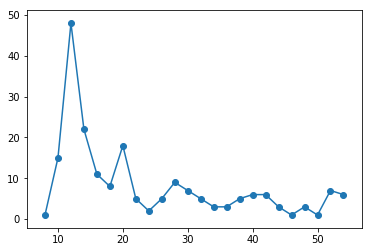

In [91]:
x_arr = [j for j in dict(final).keys()]
y_arr = [dict(final)[j] for j in dict(final).keys()]

x_arr_final = []
y_arr_final = []

while (len(x_arr) > 0):

    x_arr_final.append(min(x_arr))
    y_arr_final.append(y_arr[x_arr.index(min(x_arr))])
    holder = x_arr.index(min(x_arr))
    del x_arr[holder]
    del y_arr[holder]

plt.plot(x_arr_final, y_arr_final)
plt.scatter(x_arr_final, y_arr_final)
plt.show()

As you can see, we get a pretty strange probability distribution! This is due to the fact that repeated applications of the Hadamard gate to the coin qubit (which you may recall was initialized in the $|\downarrow\rangle$ state). Over time, interference causes our coin qubit to bias to the left, but also creates a small bump far to the right as well! If you think this is weird, do the math! Take a qubit in the initial state of $|1\rangle$ and repeatedlly apply a Hadamard transformation, then calculate the probabilities of measuring $|0\rangle$ and $|1\rangle$ by taking the modulus squared of the probability amplitude corresponding to each of the states. In fact, let's see what happens when our qubit is initialized in the $|\uparrow\rangle$ state: 

Counter({52: 25, 48: 9, 54: 8, 44: 7, 50: 6, 16: 5, 42: 5, 46: 5, 12: 4, 22: 3, 38: 2, 36: 2, 34: 2, 30: 2, 56: 2, 10: 2, 20: 2, 40: 2, 28: 2, 24: 2, 18: 1, 32: 1, 26: 1})


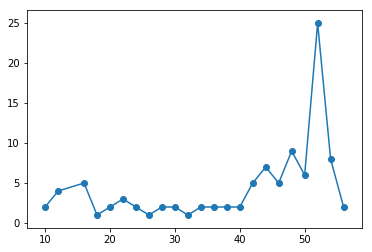

In [77]:
def initial_state():

    yield cirq.X.on(cirq.GridQubit(0, 1))

number_qubits = 7
iterator = 30
sample_number = 200

circuit = cirq.Circuit()

circuit.append(initial_state())

for j in range(0, iterator):
    circuit.append(walk_step())
circuit.append(cirq.measure(*qubits, key='x'))

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=sample_number)
final = result.histogram(key='x')

print(final)

x_arr = [j for j in dict(final).keys()]
y_arr = [dict(final)[j] for j in dict(final).keys()]

x_arr_final = []
y_arr_final = []

while (len(x_arr) > 0):

    x_arr_final.append(min(x_arr))
    y_arr_final.append(y_arr[x_arr.index(min(x_arr))])
    holder = x_arr.index(min(x_arr))
    del x_arr[holder]
    del y_arr[holder]

plt.plot(x_arr_final, y_arr_final)
plt.scatter(x_arr_final, y_arr_final)
plt.show()

Cool, right!? It's the mirror image of what we saw when the coin qubit was in the other state. Let's try one more thing, let's initialize our coin qubit in a "balanced" state, where interference doesn't bias our distribution towards only one side! We will set our initial state to:
<br><br>
<center>
    $$|i\rangle \ = \ \frac{|\uparrow\rangle \ + \ i|\downarrow\rangle}{\sqrt{2}}$$
</center>
<br><br>
This is easily implemented by applying a Hadamard gate to $|\uparrow\rangle$, and then applying an $S$ gate to the qubit. When we simulate this with Cirq, we get:

Counter({52: 26, 12: 25, 50: 20, 54: 13, 16: 13, 10: 12, 14: 10, 48: 10, 20: 10, 18: 8, 44: 7, 36: 7, 46: 6, 24: 4, 26: 4, 28: 4, 38: 4, 34: 3, 42: 3, 30: 3, 40: 2, 56: 2, 22: 2, 32: 2})


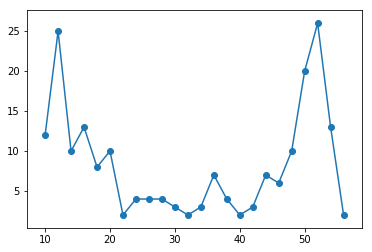

In [65]:
def initial_state():

    yield cirq.X.on(cirq.GridQubit(0, 1))
    
    yield cirq.H.on(cirq.GridQubit(0, number_qubits))
    yield cirq.S.on(cirq.GridQubit(0, number_qubits))

number_qubits = 7
iterator = 30
sample_number = 200

circuit = cirq.Circuit()

circuit.append(initial_state())

for j in range(0, iterator):
    circuit.append(walk_step())
circuit.append(cirq.measure(*qubits, key='x'))

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=sample_number)
final = result.histogram(key='x')

print(final)

x_arr = [j for j in dict(final).keys()]
y_arr = [dict(final)[j] for j in dict(final).keys()]

x_arr_final = []
y_arr_final = []

while (len(x_arr) > 0):

    x_arr_final.append(min(x_arr))
    y_arr_final.append(y_arr[x_arr.index(min(x_arr))])
    holder = x_arr.index(min(x_arr))
    del x_arr[holder]
    del y_arr[holder]

plt.plot(x_arr_final, y_arr_final)
plt.scatter(x_arr_final, y_arr_final)
plt.show()

So we get a probability distribution that is much more symetric!
<br><br>
Random walks have applications in so many fields of scientfific inquiry, ranging from biology, to computer science, to finance. I definitely think there are a lot of possible great extensions to this basic example of a QRW and many more great projects that can be made by utilizing this interesting process! For more information on these applications, see: https://en.wikipedia.org/wiki/Random_walk#Applications